## Здравствуйте, меня зовут *Борис Михеев*, вот моё Задание №1 по курсу ПСАД-2023!

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from collections import defaultdict
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

np.random.seed(228)

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

### Задача 1  

Задана выборка, включающая значения переменной $X$. 

X sample mean:  5.206


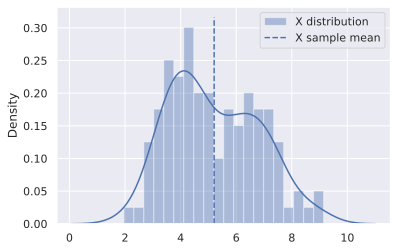

In [ ]:
X = pd.read_excel('t1_data.xlsx').values.ravel()

sns.distplot(X, label='X distribution', bins=20)
plt.vlines(X.mean(), *plt.ylim(), linestyles='--', colors='b', label="X sample mean")
plt.legend()
print("X sample mean: ", np.round(X.mean(), 3))
plt.show()

Определите доверительный интервал для математического ожидания на уровне $\alpha$ (для каждого $\alpha$ из списка) c использованием распределения Стьюдента.

In [ ]:
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 

In [ ]:
def student_mci(data, alpha=0.05):
    # Your code goes here...
    s = np.std(data, ddof=1)
    n = data.shape[0]
    t = sp.stats.t(n - 1).ppf(1 - alpha / 2) * s / np.sqrt(n)
    data_mean = np.mean(data)
    return data_mean - t, data_mean + t

Рассмотрим получающиеся доверительные интервалы при различных $\alpha$:

In [ ]:
for alpha in alpha_list:
    print(f'Alpha={alpha}:')
    c_l, c_u = student_mci(X, alpha)
    print(f'[{c_l}, {c_u}]')
    print()

Alpha=0.1:
[4.9555408822430085, 5.456495153793027]

Alpha=0.075:
[4.934601430031591, 5.4774346060044445]

Alpha=0.05:
[4.906777811970127, 5.5052582240659085]

Alpha=0.025:
[4.862878179081061, 5.549157856954974]

Alpha=0.01:
[4.810215473169937, 5.601820562866098]



Результаты вполне адекватны и логичны, согласуются с графиком распределения выборки.

### Задача 2

Два предприятия выпускают  изделия одного и того же назначения. Предприятие I выпускает изделия с математическим ожиданием срока службы $T_1$, предприятие II выпускает изделия с математическим ожиданием срока службы $T_2$. Сроки службы изделий обоих предприятий распределены нормально и стандартные отклонения для них равны $\sigma_1$ и $\sigma_2$ соответственно. При этом $T_1 < T_2$, но изделия второго предприятия дороже.

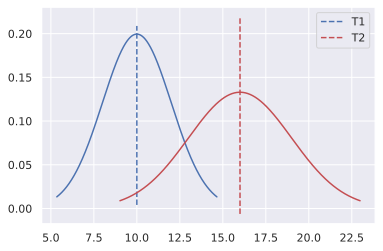

In [ ]:
T1, T2, sigma1, sigma2 = 10, 16, 2, 3

def plot_T(T, sigma, c, label):
    norm = sp.stats.norm(loc=T, scale=sigma)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
    plt.plot(x, norm.pdf(x), c=c)
    plt.vlines(T, *plt.ylim(), linestyles='--', colors=c, label=label)
    
plot_T(T1, sigma1, 'b', 'T1')
plot_T(T2, sigma2, 'r', 'T2')
plt.legend()
plt.show()

Третье предприятие утверждает, что ему удалось разработать технологию производства изделий со средним сроком службы  предприятия II, но по цене предприятия I. В качестве доказательства предлагаются результаты тестирования для $k$ изделий. 

Нулевая гипотеза $H_0$ предполагает, что на самом деле срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия I. Альтернативная гипотеза $H_1$ предполагает, что срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия II. Проверка этих двух предположений производится путем сравнения эмпирически оцененного среднего срока службы протестированных изделий предприятия III с некоторым порогом $T$. Конкретное значение $T$ находится из условия того, что допустимая ошибка первого рода равна $\alpha$. Значение ошибки второго рода обозначим через $\beta = \beta(\alpha, k)$.

Постройте график мощности такого теста в зависимости от $k$ и сделайте выводы.

Конкретное значение $\alpha$ в условии не указано, поэтому можем принять $\alpha=0.05$.

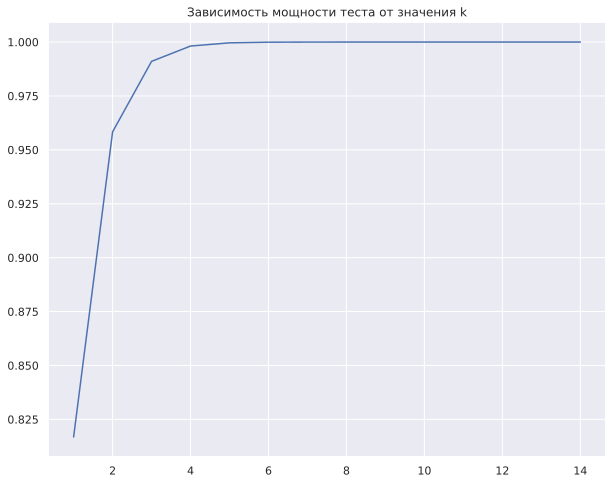

In [ ]:
# Your code goes here...
plt.figure(figsize=(10, 8))
def power(mu_1, sigma_1, mu_2, sigma_2, alpha, k):
    sigma_1 /= np.sqrt(k)
    sigma_2 /= np.sqrt(k)
    z = sp.stats.norm(mu_1, sigma_1).ppf(1 - alpha)
    return 1 - sp.stats.norm(mu_2, sigma_2).cdf(z)

k_vals = np.arange(1, 15)
pows = np.array([power(T1, sigma1, T2, sigma2, 0.05, k_val) for k_val in k_vals])
plt.plot(k_vals, pows)
plt.title('Зависимость мощности теста от значения k')
plt.grid(True)

**Выводы:**

По графику видно, что с ростом объема выборки $k$ мощность теста возрастает, соответственно, уменьшается вероятность ошибки второго рода. После примерно $k=4$, $k=5$ график выходит на плато со значением $1$, так что данных размеров выборки вероятно будет достаточно. 

### Задача 3

В 5 серии 13 сезона передачи “Разрушители легенд” проверялась справедливость выражения “know something like the back of one’s hand”. В эксперименте принимало участие 12 испытуемых. Каждому из них были предъявлены 10 фотографий похожих рук разных людей, среди которых они должны были угадать свою.
11 из 12 испытуемых выбрали свою фотографию.
\($H_0$\): испытуемые выбирают фотографии тыльной стороны руки наугад (\($p$=0.1\)).
\($H_1$\): испытуемые выбирают фотографию тыльной стороны своей собственной руки осознанно (\($p>0.1$\)).


1. Воспользуйтесь точным биномиальным критерием для проверки ($H_0$) против альтернативы ($H_1$). Для этого:

	- Постройте нулевое распределение статистики числа успехов в выборке распределения Бернулли с параметром p. Сформируйте выборку сами напрямую из условия задачи.
	- Напишите функцию, которая принимала бы на вход тройку чисел (np,nq,p0), где np – число успехов, nq – число неудач в выборке размера np + nq, p0 – значение параметра p, задающего нулевую гипотезу. Ваша функция должна возвращать значение достигаемого уровня значимости против правосторонней альтернативы.
	- Сравните значения, выдаваемые вашей функцией со стандартным тестом `binom_test(·)` из `scipy`
	- Отвергается ли гипотеза ($H_0$) на достигаемом уровне значимости 0.05? p-value?

Построим нулевое распределение и сгенерируем выборку согласно с условием задачи:

In [ ]:
# Your code goes here...
def binomial_coef(n, k):
    if k > n - k:
        k = n - k
    coef = 1
    for i in range(k):
        coef *= (n - i)
        coef /= (i + 1)
    return coef

def bin_dist(n, p):
    sup = np.arange(n + 1)
    p_vals = np.array([binomial_coef(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in sup])
    return sup, p_vals

In [ ]:
def gen_data(n, n_pos):
    X = np.zeros(n, dtype=int)
    idx = np.random.permutation(n)[:n_pos]
    X[idx] = 1
    return X

In [ ]:
n = 12
n_pos = 11
X = gen_data(n, n_pos)
X

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Функция вычисления уровня значимости:

In [ ]:
def p_value(np, nq, p0):
    n = np + nq
    sup, p_vals = bin_dist(n, p0)
    idx = (sup >= np)
    return p_vals[idx].sum()

Найдем p-value:

In [ ]:
p = 0.1
p_value(n_pos, n - n_pos, p)

1.0900000000000006e-10

Сравним со стандартным тестом из scipy, при различных $n$ и $p$. Построим графики и сравним визуально.

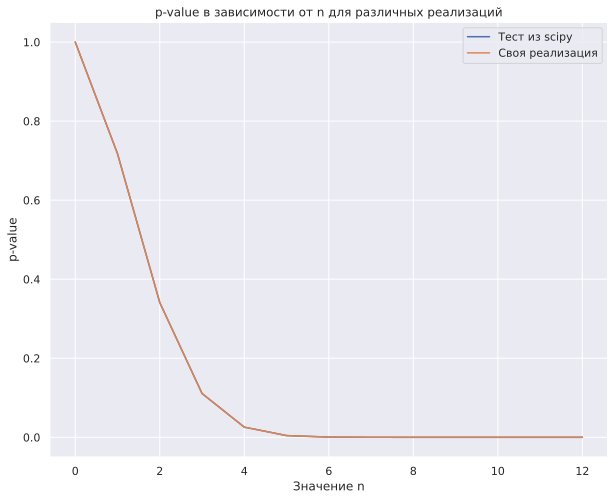

In [ ]:
plt.figure(figsize=(10, 8))
sup = np.arange(n + 1)
scipy_vals = np.array([sp.stats.binom_test(i, n, p, 'greater') for i in sup])
custom_vals = np.array([p_value(i, n - i, p) for i in sup])
plt.plot(sup, scipy_vals, label='Тест из scipy')
plt.plot(sup, custom_vals, label='Своя реализация')
plt.xlabel('Значение n')
plt.ylabel('p-value')
plt.title('p-value в зависимости от n для различных реализаций')
plt.legend()
plt.grid(True)

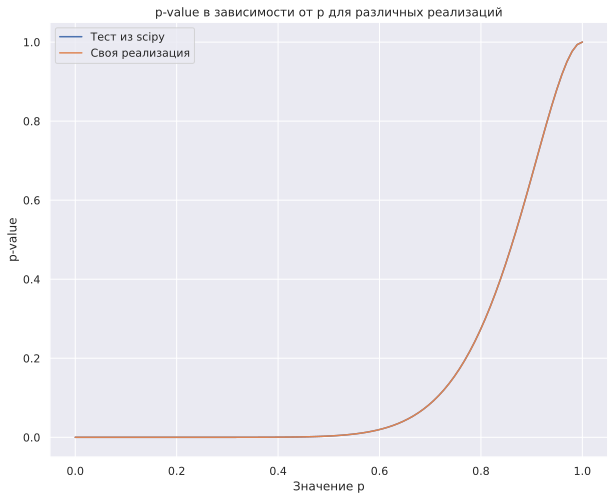

In [ ]:
plt.figure(figsize=(10, 8))
p_vals = np.linspace(0, 1, 100)
scipy_vals = np.array([sp.stats.binom_test(n_pos, n, i, 'greater') for i in p_vals])
custom_vals = np.array([p_value(n_pos, n - n_pos, i) for i in p_vals])
plt.plot(p_vals, scipy_vals, label='Тест из scipy')
plt.plot(p_vals, custom_vals, label='Своя реализация')
plt.xlabel('Значение p')
plt.ylabel('p-value')
plt.title('p-value в зависимости от p для различных реализаций')
plt.legend()
plt.grid(True)

Судя по графикам, получаемые значения в обоих тестах очень близки друг к другу, почти полностью совпадают, визуально графики наслаиваются друг на друга. 

Далее сравним тесты применительно к рассматриваемой задаче:

In [ ]:
print(f'Scipy test p-value: {sp.stats.binom_test(n_pos, n, p, "greater")}')
print(f'Custom test p-value: {p_value(n_pos, n - n_pos, p)}')

Scipy test p-value: 1.0900000000000006e-10
Custom test p-value: 1.0900000000000006e-10


Полученные значения совпадают. Значение p-value=$1.0900000000000006^{-10}$ меньше заданного уровня значимости $0.05$, следовательно, гипотеза $H_0$ отвергается при уровне значимости $0.05$.

2. Воспользуйтесь z-критерием для вычисления p-value (`proportions_ztest` из `statsmodels`).

In [ ]:
# Your code goes here...
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(n_pos, n, 0.1, 'larger')[1]

6.85528054545589e-25

Гипотеза $H_0$ так же будет отвергнута при том же уровне значимости.


3. Получите доверительный интервал Клоппера-Пирсона. (`proportion_confint` из `statsmodels` для построения доверительного интервала)

In [ ]:
# Your code goes here...
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_pos, n)

(0.7602897792479355, 1.0)

4. Реализуйте формулы для подсчёта уровней значимости критерием Вальда и множителей Лагранжа (используйте `norm.sf` из `scipy`). Проанализируйте результаты.

Рассмотрим критерий Вальда. В данной задаче по сути имеем биномиальное распределение $Bin(n, p)$: $X_1, \cdots, X_n \sim Ber(p), \sum\limits_{i=1}^n X_i \sim Bin(n, p)$.  В качестве статистики возьмем $T=\sum\limits_{i=1}^n X_i$.

Правдоподобие: $L(p)=p^T(1-p)^{n - T} \Rightarrow \log L(p) = T\log p+(n-T)\log(1-p)$. 

$\frac{\partial \log L(p)}{\partial p}=\frac{T}{p}-\frac{n - T}{1 - p}=0 \Rightarrow \hat p_{MLE}=\frac{T}{n}$. 

$\mathbb{D}\hat p_{MLE}=\frac{\hat p_{MLE} (1 - \hat p_{MLE})}{n} \Rightarrow Z_W=\frac{\hat p_{MLE} - p_0}{\sqrt{\frac{\hat p_{MLE} (1 - \hat p_{MLE})}{n}}}$.

Будем рассматривать правостороннюю альтернативу.

In [ ]:
# Your code goes here...
def wald_test(n, n_pos, p, alt_type):
    p_mle = n_pos / n
    D_p_mle = p_mle * (1 - p_mle) / n
    Z_w = (p_mle - p) / np.sqrt(D_p_mle)
    if alt_type == 'left':
        return sp.stats.norm.cdf(Z_w)
    elif alt_type == 'right':
        return sp.stats.norm.sf(Z_w)
    elif alt_type == 'two-sided':
        return 2 * sp.stats.norm.sf(np.abs(Z_w))

Рассмотрим при различных $p$:

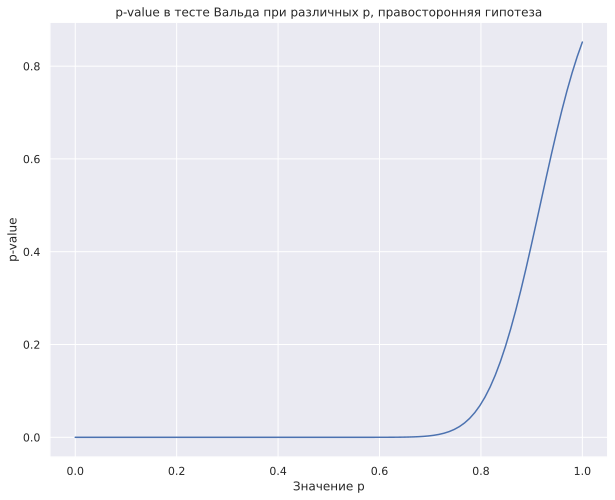

In [ ]:
plt.figure(figsize=(10,8))
p_vals = np.linspace(0, 1, 100)
wald_test_vals = np.array([wald_test(n, n_pos, i, 'right') for i in p_vals])
plt.plot(p_vals, wald_test_vals)
plt.title('p-value в тесте Вальда при различных p, правосторонняя гипотеза')
plt.xlabel('Значение p')
plt.ylabel('p-value')
plt.grid(True)

Рассмотрим применительно к задаче:

In [ ]:
wald_test(n, n_pos, p, 'right')

6.85528054545589e-25

Таким образом, нулевая гипотеза так же будет отвергнута, т. к. полученный уровень значимости ниже заданного $0.05$.

Также рассмотрим $\hat p_{MLE}$:

In [ ]:
p_mle = n_pos / n
p_mle

0.9166666666666666

Результаты согласуются с графиком, наиболее вероятное значение параметра в задаче достаточно велико, и нулевая гипотеза будет отвергаться при малых $p$ как неверная.

Рассмотрим критерий меток (множителей Лагранжа).

$Z_S=\frac{\hat p_{MLE}-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$, $\quad \hat p_{MLE}=\frac{T}{n}$



In [ ]:
def lagrange_test(n, n_pos, p, alt_type):
    p_mle = n_pos / n
    Z_s = (p_mle - p) / np.sqrt(p * (1 - p) / n)
    if alt_type == 'left':
        return sp.stats.norm.cdf(Z_s)
    elif alt_type == 'right':
        return sp.stats.norm.sf(Z_s)
    elif alt_type == 'two-sided':
        return 2 * sp.stats.norm.sf(np.abs(Z_s))

Рассмотрим при различных $p$:

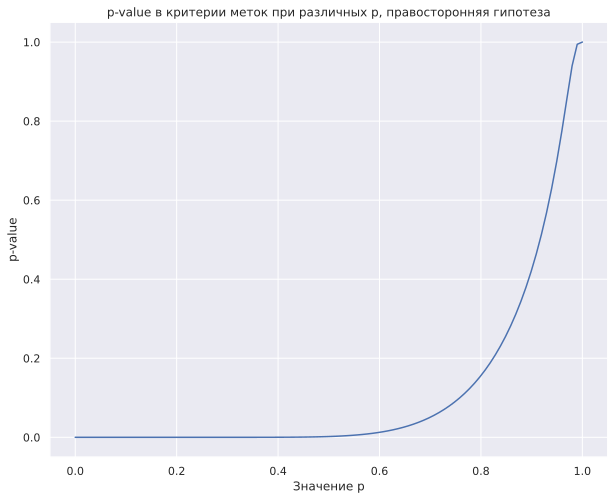

In [ ]:
plt.figure(figsize=(10,8))
p_vals = np.linspace(0, 1, 100)
lagrange_test_vals = np.array([lagrange_test(n, n_pos, i, 'right') for i in p_vals])
plt.plot(p_vals, lagrange_test_vals)
plt.title('p-value в критерии меток при различных p, правосторонняя гипотеза')
plt.xlabel('Значение p')
plt.ylabel('p-value')
plt.grid(True)

Рассмотрим применительно к задаче:

In [ ]:
lagrange_test(n, n_pos, p, 'right')

2.0493817493281634e-21

Нулевая гипотеза так же будет отвергнута, полученное p-value меньше уровня значимости $0.05$. График при различных $p$ в целом схож с графиком для теста Вальда, однако полученное значение p-value выше.

**Выводы:**

p-value во всех случаях получилось очень близким к нулю, т. е. нулевая гипотеза будет отвергаться даже при очень низком заданном уровне значимости. В целом это логично, т. к. $11$ успешных выборов из $12$ при $p=0.1$ получить маловероятно, и это подтверждается в рассмотренных статистических тестах.  

### Задача 4

Задана выборка $Y$ результатов распознавания для некоторой задачи классификации.

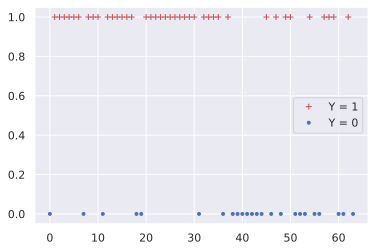

In [ ]:
Y = pd.read_excel("t2_data.xlsx").values.ravel()

plt.plot(np.arange(Y.size)[Y == 1], np.count_nonzero(Y == 1) * [1], 'r+', label='Y = 1')
plt.plot(np.arange(Y.size)[Y == 0], np.count_nonzero(Y == 0) * [0], 'b.', label='Y = 0')
plt.legend()
plt.show()

Оцените доверительный интервал для показателя *ACCURACY* с использованием...

Метода Клоппера-Пирсона (с использованием аппроксимации через __бета__ распределение).

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials

In [ ]:
def bin_clopper_pearson(data, alpha=0.05):
    # Your code goes here
    pos = data.sum()
    neg = data.shape[0] - pos
    c_l = sp.stats.beta.ppf(alpha / 2, pos, neg + 1)
    c_u = sp.stats.beta.ppf(1 - alpha / 2, pos + 1, neg)
    return c_l, c_u

А также с помощью __нормальной__ аппроксимации

In [ ]:
def bin_normal_approx(data, alpha=0.05):
    # Your code goes here
    p_hat = data.sum() / data.shape[0]
    z = sp.stats.norm.ppf(1 - alpha / 2)
    D = np.sqrt(p_hat * (1 - p_hat) / data.shape[0])
    return p_hat - D * z, p_hat + D * z

Сравните результаты и сделайте выводы.

In [ ]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Clopper-Pearson,Normal
0,0.100,"[0.515, 0.726]","[0.525, 0.725]"
1,0.075,"[0.506, 0.733]","[0.517, 0.733]"
2,0.050,"[0.495, 0.743]","[0.506, 0.744]"
3,0.025,"[0.478, 0.757]","[0.489, 0.761]"
4,0.010,"[0.457, 0.774]","[0.469, 0.781]"


Также сравните ваши реализованные метод с библиотечными: `statsmodels.stats.proportion.proportion_confint`, в вариантах  `proportion_confint(k, n, alpha, 'beta')` и `proportion_confint(k, n, alpha, 'normal')`

In [ ]:
# Your code goes here...
from statsmodels.stats.proportion import proportion_confint
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 
res['Statsmodels Clopper-Pearson'] = [np.round(proportion_confint(Y.sum(), Y.shape[0], alpha, 'beta'), 3) for alpha in alpha_list]
res['Statsmodels Normal'] = [np.round(proportion_confint(Y.sum(), Y.shape[0], alpha, 'normal'), 3) for alpha in alpha_list]
res

,alpha,Clopper-Pearson,Normal,Statsmodels Clopper-Pearson,Statsmodels Normal
0,0.100,"[0.515, 0.726]","[0.525, 0.725]","[0.515, 0.726]","[0.525, 0.725]"
1,0.075,"[0.506, 0.733]","[0.517, 0.733]","[0.506, 0.733]","[0.517, 0.733]"
2,0.050,"[0.495, 0.743]","[0.506, 0.744]","[0.495, 0.743]","[0.506, 0.744]"
3,0.025,"[0.478, 0.757]","[0.489, 0.761]","[0.478, 0.757]","[0.489, 0.761]"
4,0.010,"[0.457, 0.774]","[0.469, 0.781]","[0.457, 0.774]","[0.469, 0.781]"


**Выводы:**

Доверительные интервалы, получаемые обоими способами, примерно одинаковы, для метода Клоппера-Пирсона левая граница всегда меньше, чем для нормальной аппроксимации. Также значения для реализованных методов полностью совпадает с результатом для соответствующих библиотечных версий из statsmodels, что свидетельствует о правильности написанных реализаций.  

### Задача 5

#### Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [ ]:
rats = pd.read_table("rats.txt", sep="\t")
rats.sample(5)

,lifespan,diet
84,1190,restricted
29,893,restricted
57,1057,restricted
70,1129,restricted
123,620,ad libitum


In [ ]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

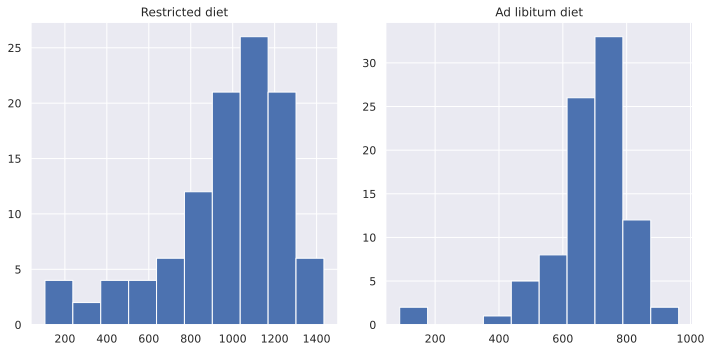

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout()

1. Какую альтернативную гипотезу следует выбрать на ваш взгляд?

Ответ:

По графику можно сказать, что при диете ad libitum количество крыс с высокой продолжительностью жизни меньше, и в целом они живут меньше, однако крыс на диете ad libitum в эксперименте меньше, чем крыс на строгой диете. В целом можно предложить нулевую гипотезу о том, что средняя продолжительность жизни не меняется в зависимости от диеты, тогда в качестве альтернативы можно взять предположение о том, что при диете ad libitum средняя продолжительность жизни меньше.

2. Проверьте нулевую гипотезу

$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

против следующих альтернатив:

$H_1$: крысы на строгой диете живут дольше.

$H_1$: средняя продолжительность жизни крыс меняется при ограничении диеты. 


Для проверки можем использовать критерий Стьюдента для двух независимых выборок. Судя по тому, что в следующем пункте требуется сделать проверку с помощью `scipy.stats.ttest_ind`, то вероятно считается, что дисперсии выборок одинаковы. Рассмотрим два случая: когда дисперсии различны и когда совпадают.

Рассмотрим случай с разными дисперсиями:

In [ ]:
# Your code goes here...
def p_value_t(data1, data2, alt_type):
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    temp = np.var(data1, ddof=1) / n1 + np.var(data2, ddof=1) / n2
    T = (data1.mean() - data2.mean()) / np.sqrt(temp)
    nu = temp ** 2 / ((np.var(data1, ddof=1)) ** 2 / (n1 ** 2 * (n1 - 1)) + (np.var(data2, ddof=1)) ** 2 / (n2 ** 2 * (n2 - 1)))
    if alt_type == 'left':
        p_value = sp.stats.t(nu).cdf(T)
    elif alt_type == 'right':
        p_value = sp.stats.t(nu).cdf(-T)
    elif alt_type == 'two-sided':
        p_value = 2 * sp.stats.t(nu).cdf(-np.abs(T))
    return T, p_value

Рассмотрим правостороннюю альтернативу, т. е. что на строгой диете крысы живут дольше:

In [ ]:
p_value_t(x1, x2, 'right')

(9.161061040974156, 1.4580405594293104e-16)

Рассмотрим двустороннюю альтернативу, т. е. что средняя продолжительность жизни крыс меняется в зависимости от диеты.

In [ ]:
p_value_t(x1, x2, 'two-sided')

(9.161061040974156, 2.916081118858621e-16)

Теперь рассмотрим случай равных дисперсий:

In [ ]:
def p_value_t_eq(data1, data2, alt_type):
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    temp = (np.var(data1, ddof=1) * (n1 - 1) + np.var(data2, ddof=1) * (n2 - 1)) / (n1 + n2 - 2)
    T = (data1.mean() - data2.mean()) / np.sqrt(temp) * np.sqrt(n1 * n2 / (n1 + n2))
    if alt_type == 'left':
        p_value = sp.stats.t(n1 + n2 - 2).cdf(T)
    elif alt_type == 'right':
        p_value = sp.stats.t(n1 + n2 - 2).cdf(-T)
    elif alt_type == 'two-sided':
        p_value = 2 * sp.stats.t(n1 + n2 - 2).cdf(-np.abs(T))
    return T, p_value

Правосторонняя альтернатива:

In [ ]:
p_value_t_eq(x1, x2, 'right')

(8.663582863026864, 9.134607099939937e-16)

Двусторонняя альтернатива:

In [ ]:
p_value_t_eq(x1, x2, 'two-sided')

(8.663582863026864, 1.8269214199879875e-15)

3. Проверьте правильность вычислений (с помощью библиотечной функции `scipy.stats.ttest_ind`).

Случай неодинаковых дисперсий:

Правосторонняя альтернатива:

In [ ]:
# Your code goes here...
sp.stats.ttest_ind(x1, x2, equal_var=False, alternative='greater')

Ttest_indResult(statistic=9.161061040974156, pvalue=1.4580405594293102e-16)

Двусторонняя альтернатива:

In [ ]:
sp.stats.ttest_ind(x1, x2, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=9.161061040974156, pvalue=2.9160811188586204e-16)

Случай одинаковых дисперсий:

Правосторонняя альтернатива:

In [ ]:
sp.stats.ttest_ind(x1, x2, equal_var=True, alternative='greater')

Ttest_indResult(statistic=8.663582863026864, pvalue=9.134607099939937e-16)

Двусторонняя альтернатива:

In [ ]:
sp.stats.ttest_ind(x1, x2, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=8.663582863026864, pvalue=1.8269214199879875e-15)

Полученные значения для всех случаев очень близки, практически полностью совпадают, что свидетельствует о корректности написанных реализаций.

**Выводы:**

Во всех рассмотренных случаях полученные значения p-value достаточо малы, и, например, при часто используемом заданном уровне значимости $0.05$ нулевая гипотеза будет отвергнута, и будет принята одна из двух альтернатив, т. е. что при строгой диете продолжительность жизни крыс выше, или что средняя продолжительность жизни крыс зависит от диеты. Однако в случае равенства дисперсий и двусторонней гипотезы полученное p-value очень близко к заданному уровню значимости $0.05$.